In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


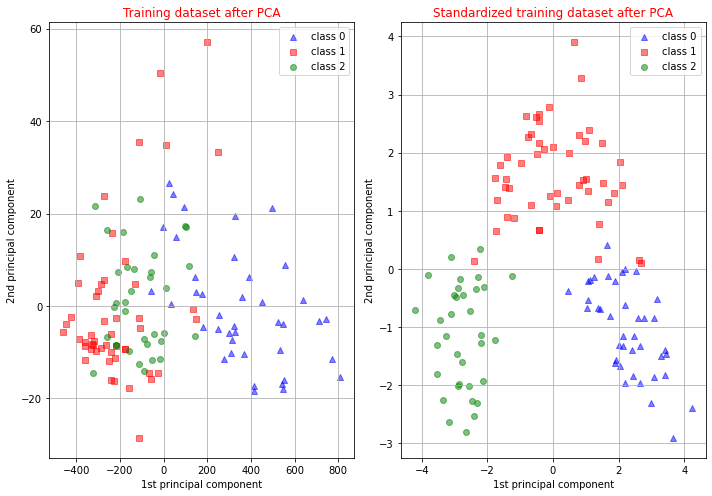

In [2]:
RANDOM_STATE = 42  # 随机数种子
FIG_SIZE = (10, 7)  # 图片大小

data = load_wine()  # wine dataset(3分类)
features, target = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

pca_u = PCA(n_components=2)
gauss_u = GaussianNB()

unscaled_clf = Pipeline([('PCA', pca_u), ('GAussianNB', gauss_u)])
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

standard_scaler = StandardScaler()  # 均值方差归一化
pca = PCA(n_components=2)
gauss = GaussianNB()  # ★★★★★需要分别初始化管道估计器(虽然估计器参数一致)
std_clf = Pipeline([('standard_scaler', standard_scaler),
                    ('PCA', pca),
                    ('GAussianNB', gauss)])
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))  # 可以看出,进行特征缩放的管道拥有更高的精确度

# Extract PCA from pipeline
pca = unscaled_clf['PCA']  # 不进行特征缩放的pca估计器
pca_std = std_clf['PCA']  # 进行特征缩放的pca估计器

# Show first principal components
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)
scaler = std_clf['standard_scaler']
X_train_std_transformed = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig = plt.figure(figsize=FIG_SIZE)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train_transformed[y_train == l, 0],
                X_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )  # 不进行特征缩放的pca散点图绘制

for l, c, m in zip(range(0, 3), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std_transformed[y_train == l, 0],
                X_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )  # 进行特征缩放的pca散点图绘制

ax1.set_title('Training dataset after PCA', color='red')
ax2.set_title('Standardized training dataset after PCA', color='red')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
plt.show()